In [39]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import os 

# File to Load
csv_file = "stats.csv"

# Read Purchasing File and store into Pandas data frame
stats = pd.read_csv(csv_file)
stats = stats.drop(columns="Unnamed: 0")

positions = stats.set_index("position")
# positions = positions.drop(columns="Unnamed: 0")
positions = positions.groupby("position").mean()
# positions.reindex(["PG", "SG", "SF", "PF", "C"])
position_data = positions.reset_index()
position_data = position_data.reindex([2,4,3,1,0])
position_data

ages = stats.set_index("age")
ages_data = ages.reset_index()
ages_data

,age,player,position,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,...,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g
0,25,Álex Abrines,SG,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,Quincy Acy,PF,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,Jaylen Adams,PG,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,Steven Adams,C,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,Bam Adebayo,C,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,21,Deng Adel,SF,CLE,19,3,10.2,0.6,1.9,0.306,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,25,DeVaughn Akoon-Purcell,SG,DEN,7,0,3.1,0.4,1.4,0.300,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,33,LaMarcus Aldridge,C,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,21,Rawle Alkins,SG,CHI,10,1,12.0,1.3,3.9,0.333,...,0.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,23,Grayson Allen,SG,UTA,38,2,10.9,1.8,4.7,0.376,...,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


Text(0, 0.5, 'Total Rebounds')

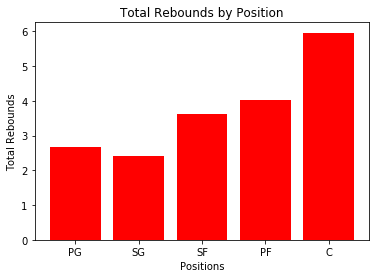

In [5]:
# position data
x_axis = position_data["position"]
trbpg = position_data["trb_per_g"]

#graph
plt.bar(x_axis, trbpg, color="r")
plt.title("Total Rebounds by Position")
plt.xlabel("Positions")
plt.ylabel("Total Rebounds")

<IPython.core.display.Javascript object>


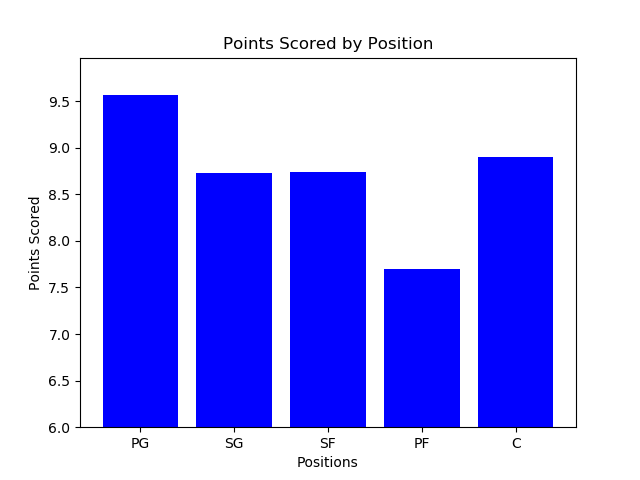

Text(0, 0.5, 'Points Scored')

In [60]:
x_axis = position_data["position"]
pointspg = position_data["pts_per_g"]

#graph
plt.bar(x_axis, pointspg, color="b")
plt.ylim(6, max(pointspg)+.4)
plt.title("Points Scored by Position")
plt.xlabel("Positions")
plt.ylabel("Points Scored")

In [23]:
#garbage code

# x_axis = ages_data["age"]
# pts = ages_data["mins_per_g"]/ sum(ages_data["mins_per_g"])
# # plt.xlim(18, max(pts)+3)
# plt.pie(pts)
# plt.title("Minutes Played by Age")
# plt.xlabel("Age")
# plt.ylabel("Minutes Played")

<IPython.core.display.Javascript object>


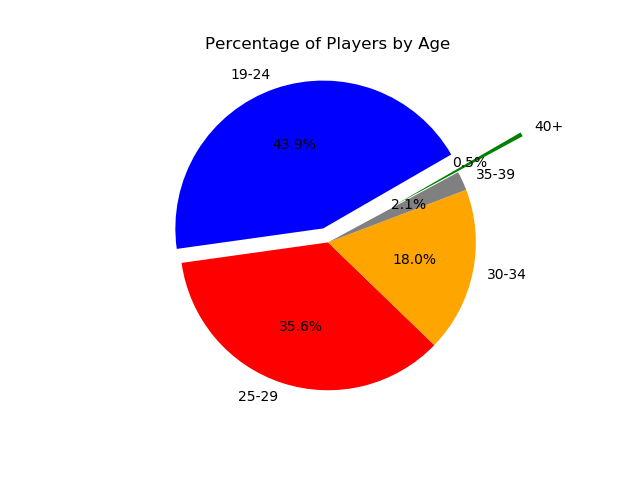

(43.87990762124711,
 35.56581986143187,
 18.013856812933028,
 2.0785219399538106,
 0.4618937644341801)

In [53]:
# Ages Pie
bins = [19, 24, 29, 34, 39, 100]
bin_labels = ["19-24","25-29","30-34","35-39","40+"]

ages_data["age group"] = pd.cut(ages_data["age"], bins, labels=bin_labels)
age_group = ages_data.groupby("age group")
age_group_data = age_group["age"].count()
age_group_summary = pd.DataFrame(age_group_data)
age_group_summary
agesum = sum(age_group_summary["age"])

g1 = float(age_group_summary.iloc[0]/agesum *100)
g2 = float(age_group_summary.iloc[1]/agesum *100)
g3 = float(age_group_summary.iloc[2]/agesum *100)
g4 = float(age_group_summary.iloc[3]/agesum *100)
g5 = float(age_group_summary.iloc[4]/agesum *100)

# Build Pie Chart
Age = ["19-24","25-29","30-34","35-39","40+"]
colors = ["blue","red","orange","grey","green"]
explode = (0.1,0,0,0,0.5)
data = (g1,g2,g3,g4,g5)

plt.title("Percentage of Players by Age")
plt.pie(data, explode=explode, colors=colors, labels=Age, autopct="%1.1f%%", shadow=False,startangle=30)

<IPython.core.display.Javascript object>


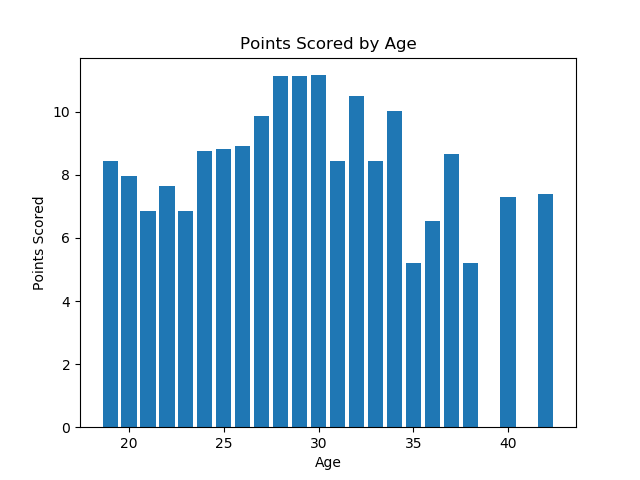

Text(0, 0.5, 'Points Scored')

In [95]:
ages_groups2 = ages_data.groupby(["age"]).agg({"pts_per_g": "mean","mins_per_g":"mean"})
ages_groups3 = ages_groups2.reset_index()

age_axis = ages_groups3["age"]
pointspb = ages_groups3["pts_per_g"]
plt.bar(age_axis,pointspb)
plt.title("Points Scored by Age")
plt.xlabel("Age")
plt.ylabel("Points Scored")


<IPython.core.display.Javascript object>


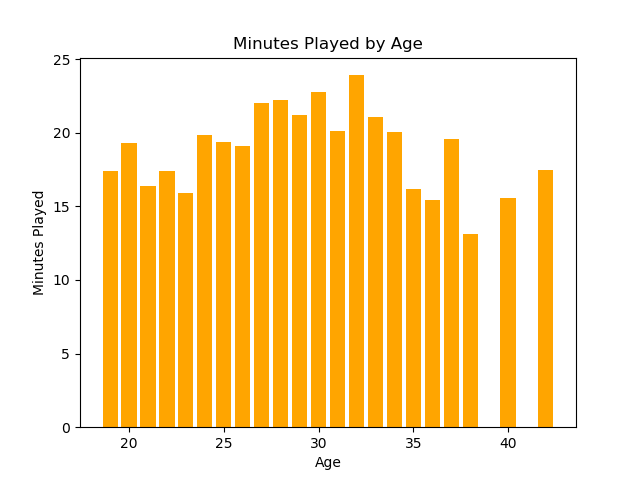

Text(0, 0.5, 'Minutes Played')

In [97]:
age_axis = ages_groups3["age"]
minutespb = ages_groups3["mins_per_g"]
plt.bar(age_axis,minutespb, color="orange")
plt.title("Minutes Played by Age")
plt.xlabel("Age")
plt.ylabel("Minutes Played")